<a href="https://colab.research.google.com/github/mwadedy/KotlinUdemy/blob/master/categoriesing_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# prompt: open this file: /content/drive/MyDrive/Database/comments.xlsx

import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Database/comments.xlsx')
df


,Hit Sentence,Search Word,Category
0,تبًا للاكسجين انا اتنفس مترو الرياض,وزارة النقل,وزارة النقل
1,: هخخخخ يا هو بيفك ازمة انتهى زمن تقعد ساعة كا...,Ministry of Transportation,وزارة النقل
2,@altammami62 @dr_aloqla @SaudiTransport @secur...,هيئة النقل,الهيئة العامة للنقل
3,@YeloDrive قلتوا خلال ٢١ يوم راح ينودع مبلغ ال...,Transport Authority,الهيئة العامة للنقل
4,@Dr_AlghamdiA بتصدع الراس عانيت منها في قطار ا...,الطيران المدني,الطيران المدني
...,...,...,...
186,@wain2030 @TurkiShalhoub لاتقول بلدنا ليست بلد...,NaN,NaN
187,@938 @SaudiTransport @938 @RGAsaudi,NaN,NaN
188,@TGA_CARE @starlinks_me شركة هاذي كذابة ارجو ت...,NaN,NaN
189,@RGAsaudi نتمنى فضلا لا امرا من الرئيس التنفيذ...,NaN,NaN


In [6]:
import pandas as pd
import re

def classify_comment(comment, search_words, categories):
    """
    تصنيف التعليقات بناءً على الكلمات المفتاحية.

    Args:
        comment (str): التعليق المراد تصنيفه.
        search_words (list): قائمة بالكلمات المفتاحية.
        categories (list): قائمة بالتصنيفات المقابلة للكلمات المفتاحية.

    Returns:
        dict: قاموس يحتوي على عدد مرات تكرار كل تصنيف.
    """
    category_counts = {}
    for word, category in zip(search_words, categories):
        # استخدام التعبيرات النمطية للبحث عن الكلمة بشكل كامل مع مراعاة الحروف العربية
        matches = re.findall(r'\b' + re.escape(word) + r'\b', comment)
        if matches:
            count = len(matches)
            if category in category_counts:
                category_counts[category] += count
            else:
                category_counts[category] = count
    return category_counts

In [2]:
import pandas as pd
# 1. قراءة ملف Excel
try:
  df = pd.read_excel('/content/drive/MyDrive/Database/comments.xlsx')
except FileNotFoundError:
  print("Error: The file 'comments.xlsx' was not found. Please ensure the file exists in the same directory as this script, or provide the full path to the file.")
  exit()

In [3]:
# التحقق من وجود الأعمدة المطلوبة
if 'Hit Sentence' not in df.columns or 'Search Word' not in df.columns or 'Category' not in df.columns:
    print("Error: The Excel file must contain columns named 'Hit Sentence', 'Search Word', and 'Category'.")
    exit()


In [4]:
# 2. تهيئة البيانات
comments = df["Hit Sentence"].astype(str).tolist()
search_words = df["Search Word"].astype(str).tolist()
categories = df["Category"].astype(str).tolist()


In [7]:
# 3. تطبيق دالة التصنيف
df["Category Counts"] = [classify_comment(comment, search_words, categories) for comment in comments]


In [8]:
# 4. تجميع النتائج
results_df = pd.DataFrame(df["Category Counts"].tolist(), index=df["Hit Sentence"])
results_df.index.name = "Hit Sentence"  # تعيين اسم العمود index
results_df = results_df.fillna(0)


In [10]:
# 5. إنشاء ملف Excel جديد
results_df.to_excel("classified_comments.xlsx")

print("تم تحليل البيانات وحفظها في ملف classified_comments.xlsx")


تم تحليل البيانات وحفظها في ملف classified_comments.xlsx


In [13]:
pip install arabic_reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 5.4 MB/s eta 0:00:00


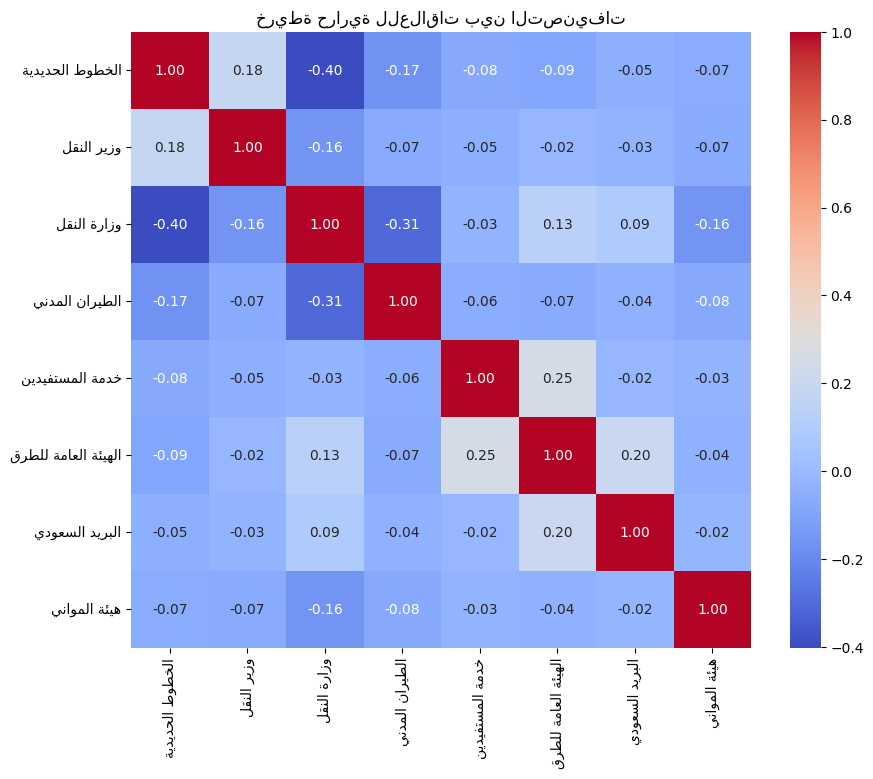

In [15]:
# عرض خريطة حرارية باستخدام إطار البيانات results_df

import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper # For Arabic text reshaping
from bidi.algorithm import get_display # For bidirectional text display


# إنشاء خريطة حرارية
plt.figure(figsize=(10, 8))  # ضبط حجم الشكل حسب الحاجة

# Arabic Reshaping for labels:
heatmap_data = results_df.corr()
# Apply reshaping to index and columns before plotting:
heatmap_data.index = [get_display(arabic_reshaper.reshape(label)) for label in heatmap_data.index]
heatmap_data.columns = [get_display(arabic_reshaper.reshape(label)) for label in heatmap_data.columns]


sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('خريطة حرارية للعلاقات بين التصنيفات')  # عنوان بالعربية
plt.show()